In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow
import graphviz

In [2]:
# Load datasets
conditions = pd.read_excel(r"C:\Users\ABHISHEK BANKAWAT\Desktop\Data_Engineering_Task\Dataset\conditions.xlsx")
encounters = pd.read_parquet(r"C:\Users\ABHISHEK BANKAWAT\Desktop\Data_Engineering_Task\Dataset\encounters.parquet", engine='pyarrow')
symptoms = pd.read_csv(r"C:\Users\ABHISHEK BANKAWAT\Desktop\Data_Engineering_Task\Dataset\symptoms.csv")
medications = pd.read_csv(r"C:\Users\ABHISHEK BANKAWAT\Desktop\Data_Engineering_Task\Dataset\medications.csv")
patients = pd.read_csv(r"C:\Users\ABHISHEK BANKAWAT\Desktop\Data_Engineering_Task\Dataset\patients.csv")

### Exploring datasets for Data Quality Issues

In [4]:
patients.head()

,PATIENT_ID,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,CITY,STATE,COUNTY,FIPS,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,INCOME
0,54f1059e-6250-3949-6dd0-1dda9b85d22a,2002-01-21,NaN,999-28-3364,S99987398,X44428214X,Ms.,Fredricka415,Crist667,NaN,...,Fort Worth,Texas,Tarrant County,48439.0,76104,0.329154,-97.399553,9990.08,0.0,35460
1,92675303-ca5b-136a-169b-e764c5753f06,1997-04-16,NaN,999-62-9859,S99999770,X75016560X,Mr.,Lorenzo669,Urrutia540,NaN,...,Arlington,Texas,Tarrant County,48439.0,76006,0.328145,-97.068885,10936.80,0.0,88407
2,a0b63e97-b6fd-5fe1-8f2d-2bec915efa97,1993-02-04,NaN,999-53-6488,S99979170,X60079936X,Mr.,Luther918,MacGyver246,NaN,...,Houston,Texas,Harris County,48339.0,77357,0.300834,-95.649706,10662.16,0.0,41800
3,abc59f62-dc5a-5095-1141-80b4ee8be73b,1995-05-23,NaN,999-37-1058,S99981031,X14759314X,Mrs.,Jacque955,Jones311,NaN,...,Waco,Texas,McLennan County,48309.0,76655,0.315173,-97.292558,11455.93,0.0,41915
4,28d7b56c-6056-d0a2-2991-39d6e917216c,1993-11-13,NaN,999-31-6091,S99958903,X63033472X,Mrs.,Angela104,Stanton715,NaN,...,Levelland,Texas,Hockley County,48219.0,79336,0.337037,-102.361829,12449.11,0.0,67198


In [7]:
patients.shape

(10000, 27)

In [6]:
patients.dtypes

PATIENT_ID              object
BIRTHDATE               object
DEATHDATE              float64
SSN                     object
DRIVERS                 object
PASSPORT                object
PREFIX                  object
FIRST                   object
LAST                    object
SUFFIX                  object
MAIDEN                  object
MARITAL                 object
RACE                    object
ETHNICITY               object
GENDER                 float64
BIRTHPLACE              object
ADDRESS                 object
CITY                    object
STATE                   object
COUNTY                  object
FIPS                   float64
ZIP                      int64
LAT                    float64
LON                    float64
HEALTHCARE_EXPENSES    float64
HEALTHCARE_COVERAGE    float64
INCOME                   int64
dtype: object

In [9]:
patients.columns

Index(['PATIENT_ID', 'BIRTHDATE', 'DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT',
       'PREFIX', 'FIRST', 'LAST', 'SUFFIX', 'MAIDEN', 'MARITAL', 'RACE',
       'ETHNICITY', 'GENDER', 'BIRTHPLACE', 'ADDRESS', 'CITY', 'STATE',
       'COUNTY', 'FIPS', 'ZIP', 'LAT', 'LON', 'HEALTHCARE_EXPENSES',
       'HEALTHCARE_COVERAGE', 'INCOME'],
      dtype='object')

In [11]:
patients.isna().sum()

PATIENT_ID                 0
BIRTHDATE                  0
DEATHDATE              10000
SSN                        0
DRIVERS                 2320
PASSPORT                2961
PREFIX                  2663
FIRST                      0
LAST                       0
SUFFIX                  9941
MAIDEN                  7648
MARITAL                 4146
RACE                       0
ETHNICITY                  0
GENDER                 10000
BIRTHPLACE                 0
ADDRESS                    0
CITY                       0
STATE                      0
COUNTY                     0
FIPS                     290
ZIP                        0
LAT                        0
LON                        0
HEALTHCARE_EXPENSES        0
HEALTHCARE_COVERAGE        0
INCOME                     0
dtype: int64

So we can see in the above output we have missing values in many columns and our gender column in empty so we know where we have missing values in our data and we can move with keeping that in mind

In [ ]:
patients.duplicated()
# patients.duplicated(subset=['PATIENT_ID'])

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

We have no duplicates in the dataset

<Axes: title={'center': 'County wise patients'}, xlabel='COUNTY'>

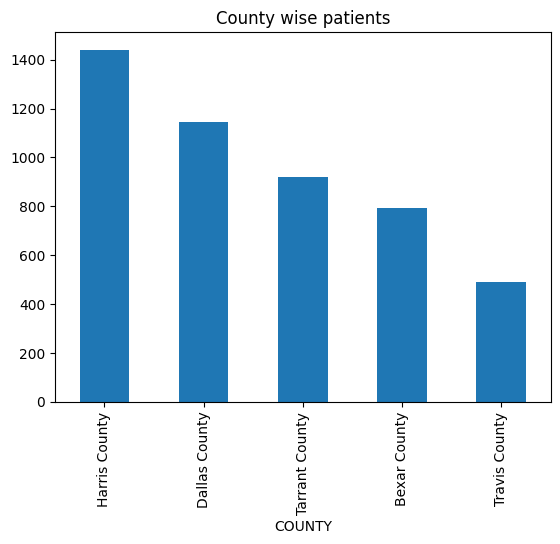

In [20]:
patients['COUNTY'].value_counts()\
        .head(5) \
        .plot(kind='bar',title='County wise patients')

<Axes: title={'center': 'Healthcare Expenses'}, ylabel='Frequency'>

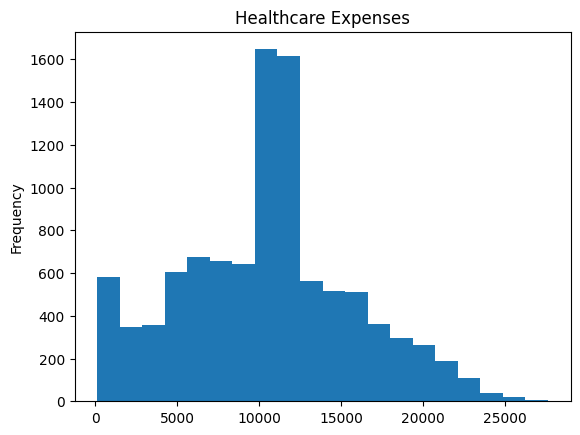

In [ ]:
patients['HEALTHCARE_EXPENSES'].plot(kind='hist', bins=20, title='Healthcare Expenses')
